# Milestone 5b: Experimentally Reconstructed Morphologies

Setup

In [1]:
import getpass
import logging
from pathlib import Path

from bluepysnap.api import Api

logging.basicConfig(level=logging.WARNING)

ORGANIZATION = "bbp"
PROJECT = "thalamus"

Paste the token from https://bbp.epfl.ch/nexus/web/

In [2]:
TOKEN = getpass.getpass()

 ·······································································································································································································································································································································································································································································································································································································································································································································································································································································································································································································································

In [3]:
api = Api(bucket=f"{ORGANIZATION}/{PROJECT}", token=TOKEN, debug=False)

### Retrieve an experimentally reconstructed morphology from a Nexus URL

Given the morphology [here](https://bbp.epfl.ch/nexus/web/bbp/thalamus/resources/https%3A%2F%2Fbbp.epfl.ch%2Fneurosciencegraph%2Fdata%2F2ec274ec-467c-46e7-8e4b-d0b316ab2deb), we know the id and we can load the resource.

In [4]:
morphology_id = "https://bbp.epfl.ch/neurosciencegraph/data/neuronmorphologies/66bcef64-7efd-4ce0-a5ac-20ada2965acb"
morphology = api.get_entity_by_id(morphology_id)
print(morphology)

Entity(resource_id=<https://bbp.epfl.ch/neurosciencegraph/data/neuronmorphologies/66bcef64-7efd-4ce0-a5ac-20ada2965acb>, resource_type=<['ReconstructedWholeBrainCell', 'NeuronMorphology', 'ReconstructedCell', 'Entity', 'Dataset']>, instance_type=<Proxy>)


In [5]:
print(morphology.resource.distribution.atLocation)

{
    type: Location
    location: file:///gpfs/bbp.cscs.ch/data/project/proj55/nexus/81379a72-d91a-4769-8e9c-0647dde74063/1/a/6/8/d/1/9/f/AA0050.swc
    store:
    {
        id: https://bbp.epfl.ch/neurosciencegraph/data/f73e185c-61ba-42cf-8d40-a42c454285d7
    }
}


### Get information related to the Morphology

In [6]:
print("Description:", morphology.description)
print("Creator:", morphology.createdBy)
print("Creation date:", morphology.createdAt)
print("Project:", morphology.project)
print("Brain region:", morphology.brainLocation.brainRegion.label)

Description: The axons are corrected in this morphology
Creator: https://bbp.epfl.ch/nexus/v1/realms/bbp/users/harikris
Creation date: 2021-03-27T21:33:55.751Z
Project: https://bbp.epfl.ch/nexus/v1/projects/bbp/thalamus
Brain region: CM


### Plot the morphology
The morphology is opened using the default opener (`neurom`).

In [7]:
print(type(morphology.instance))
print(morphology.instance.__class__)

<class 'Proxy'>
<class 'neurom.core.morphology.Morphology'>


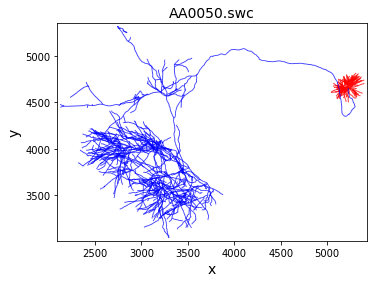

In [8]:
%matplotlib inline
from neurom.view import matplotlib_impl, matplotlib_utils
matplotlib_impl.plot_morph(morphology.instance)

### Get the soma radius of that morphology

In [9]:
import neurom
print(neurom.get('soma_radius', morphology.instance))

1.0
